# Recommendation System Notebook

In [212]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [213]:
# import libraties
import pandas as pd
import numpy as np

# Reading ratings file
ratings = pd.read_csv('beer_data.csv', encoding='latin-1')

In [214]:
ratings.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [216]:
#Checking Basic info and statistics of data frame
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB
None


In [217]:
#checking null values
ratings.isnull().sum()

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

In [218]:
#Checking the null percentage
print(round(100*(ratings.isnull().sum()/len(ratings.index)),2))

beer_beerid           0.00
review_profilename    0.02
review_overall        0.00
dtype: float64


In [219]:
#since null values for review_profilename are verly less in percentage, we can discard them
ratings_notnull=ratings.dropna()

In [220]:
print(round(100*(ratings_notnull.isnull().sum()/len(ratings_notnull.index)),2))

beer_beerid           0.0
review_profilename    0.0
review_overall        0.0
dtype: float64


In [221]:
ratings_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475884 non-null int64
review_profilename    475884 non-null object
review_overall        475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [222]:
#checking stats of rating dataframe
ratings_notnull.describe()

,beer_beerid,review_overall
count,475884.000000,475884.000000
mean,21662.619174,3.814885
std,21794.268932,0.720364
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13896.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [223]:
#checking the duplicates
ratings_notnull[ratings_notnull.duplicated()].count()

beer_beerid           580
review_profilename    580
review_overall        580
dtype: int64

In [224]:
#removing the duplicates since duplicates can give misinterpretation
cleansed_ratings=ratings_notnull.drop_duplicates(keep='first')

In [225]:
#checking info of cleansed data
cleansed_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475304 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475304 non-null int64
review_profilename    475304 non-null object
review_overall        475304 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [226]:
#verify duplicates counts again
cleansed_ratings[cleansed_ratings.duplicated()].count()

beer_beerid           0
review_profilename    0
review_overall        0
dtype: int64

In [227]:
cleansed_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475304 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475304 non-null int64
review_profilename    475304 non-null object
review_overall        475304 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


#### Que1.1 Figure out an appropriate value of N using EDA; this may not have one correct answer, 
but you should not choose beers that have an extremely low number of ratings.

In [228]:
groupdf=cleansed_ratings.groupby('beer_beerid').count()
groupdf['review_overall'].head(10)

beer_beerid
3       2
4       6
5     113
6     253
7     206
8      23
9      33
10    218
11     28
12     25
Name: review_overall, dtype: int64

In [229]:
groupdf['review_overall'].describe()

count    40304.000000
mean        11.792973
std         42.007656
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        980.000000
Name: review_overall, dtype: float64

In [230]:
import statistics
groupdf['review_overall'].mode()

0    1
dtype: int64

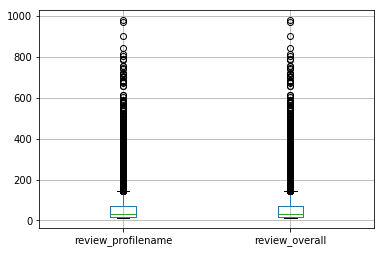

In [231]:
groupdf[groupdf['review_overall'] >11].boxplot()

In [232]:
#Answer1.1 It seems N=50 is optimal choice since median is 11 and std devation is 42.
# In furthur questions we will be considering only those bears which has more been rate by more than 50 people.

tempdf=groupdf[groupdf['review_overall'] >50].reset_index()
tempdf['beer_beerid']

0           5
1           6
2           7
3          10
4          14
5          15
6          17
7          19
8          30
9          31
10         33
11         34
12         36
13         39
14         54
15         55
16         58
17         59
18         61
19         63
20         65
21         66
22         67
23         69
24         73
25         74
26         78
27         79
28         80
29         81
        ...  
2003    67156
2004    67219
2005    67230
2006    67262
2007    67267
2008    68008
2009    68400
2010    68746
2011    68772
2012    68916
2013    68958
2014    68960
2015    69070
2016    69363
2017    69407
2018    70102
2019    70910
2020    71405
2021    71758
2022    71774
2023    71919
2024    71969
2025    72138
2026    73131
2027    74123
2028    74272
2029    74323
2030    74390
2031    74986
2032    75086
Name: beer_beerid, Length: 2033, dtype: int64

In [233]:
#getting only those bears which has been rated by more than 50 people.
filtered_rating=cleansed_ratings[cleansed_ratings['beer_beerid'].isin(tempdf['beer_beerid'])]

In [234]:
filtered_rating.shape

(295072, 3)

In [235]:
#Que2.1 What are the unique values of ratings?
filtered_rating['review_overall'].unique().tolist()

#Answer- so unique values for ratings are below:-
#3.0, 4.5, 4.0, 5.0, 3.5, 2.0, 2.5, 1.5, 1.0

[3.0, 4.5, 4.0, 5.0, 3.5, 2.0, 2.5, 1.5, 1.0]

In [237]:
# 2.2.1 The average beer ratings
df=filtered_rating.groupby('beer_beerid')
average_beer_ratings=df['review_overall'].mean()
average_beer_ratings.head(10)

beer_beerid
5     3.553097
6     3.711462
7     3.317961
10    3.883028
14    3.830508
15    3.824074
17    3.429752
19    4.009036
30    4.094398
31    3.978758
Name: review_overall, dtype: float64

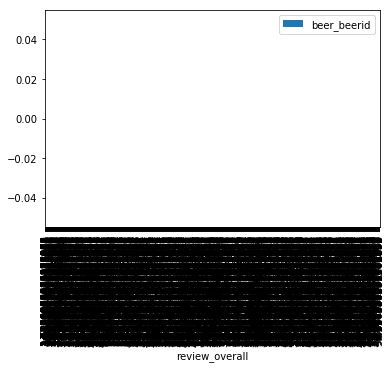

In [36]:
#visulisation of above scenario
pf=pd.DataFrame(filtered_rating['beer_beerid'],average_beer_ratings)
pf.plot.bar()

In [238]:
#2.2.2 The average user ratings
df=filtered_rating.groupby('review_profilename')
average_user_ratings=df['review_overall'].mean()
average_user_ratings.head(10)

review_profilename
0110x011       4.333333
01Ryan10       5.000000
04101Brewer    4.000000
05Harley       4.116667
0beerguy0      4.166667
0runkp0s       3.500000
0tt0           3.964286
1000Bottles    3.750000
1001111        4.000000
100floods      4.155172
Name: review_overall, dtype: float64

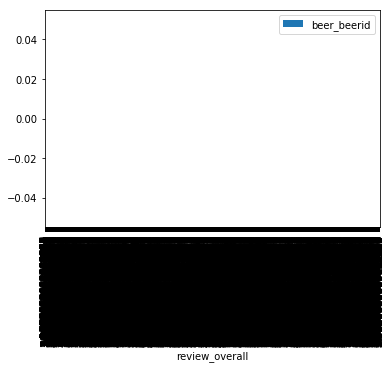

In [38]:
#visulisation of above scenario
pf=pd.DataFrame(filtered_rating['beer_beerid'],average_user_ratings)
pf.plot.bar()
#because of lots of values, it is not visible

In [239]:
#2.2.3 The average number of ratings given to the beers
df=filtered_rating.groupby(['review_profilename'])
df2=df['review_overall'].sum()/df['beer_beerid'].count()
df2.head()

review_profilename
0110x011       4.333333
01Ryan10       5.000000
04101Brewer    4.000000
05Harley       4.116667
0beerguy0      4.166667
dtype: float64

In [240]:
#2.2.4 The average number of ratings given by the users
df=filtered_rating.groupby(['beer_beerid'])
df2=df['review_overall'].sum()/df['review_profilename'].count()
df2.head()

beer_beerid
5     3.553097
6     3.711462
7     3.317961
10    3.883028
14    3.830508
dtype: float64

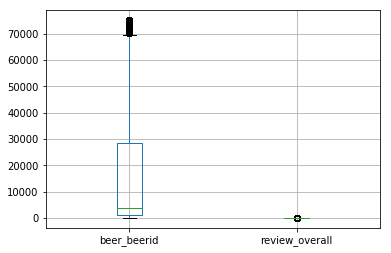

In [43]:
#some other vvisulization
filtered_rating.boxplot()

In [241]:
#some more preprocessing step before modelling
#remove the duplicate beer id ,review_profilename from filterred rating dataframe
user_df=filtered_rating.drop_duplicates(subset=['beer_beerid','review_profilename'],keep="first")

In [242]:
user_df.shape

(294446, 3)

In [243]:
#3 Recommendation Models
#3.1 Divide your data into training and testing dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_df, test_size=0.30, random_state=31)

## Dividing the dataset into train and test

In [244]:
print(train.shape)
print(test.shape)

(206112, 3)
(88334, 3)


In [245]:
# pivot ratings into movie features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [246]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 


In [247]:
dummy_train = train.copy()
dummy_test = test.copy()

In [248]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [249]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [250]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [251]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User Similarity Matrix

## Using Cosine Similarity

In [252]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [253]:
user_correlation.shape

(17126, 17126)

## Using adjusted Cosine 

### Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [254]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [255]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the beer for each user aroung 0 mean

In [256]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [257]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [258]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [259]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Rating predicted by the user (for beers rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset). 

In [260]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[1.45901297, 3.47228087, 2.90996484, ..., 1.17202177, 3.18428604,
        2.34504124],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.71302885, 6.63114591, 5.57393958, ..., 2.03157124, 6.54093927,
        0.95460668],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.38547202, 7.21770062, 1.85240985, ..., 0.52392293, 0.75058221,
        1.83833509]])

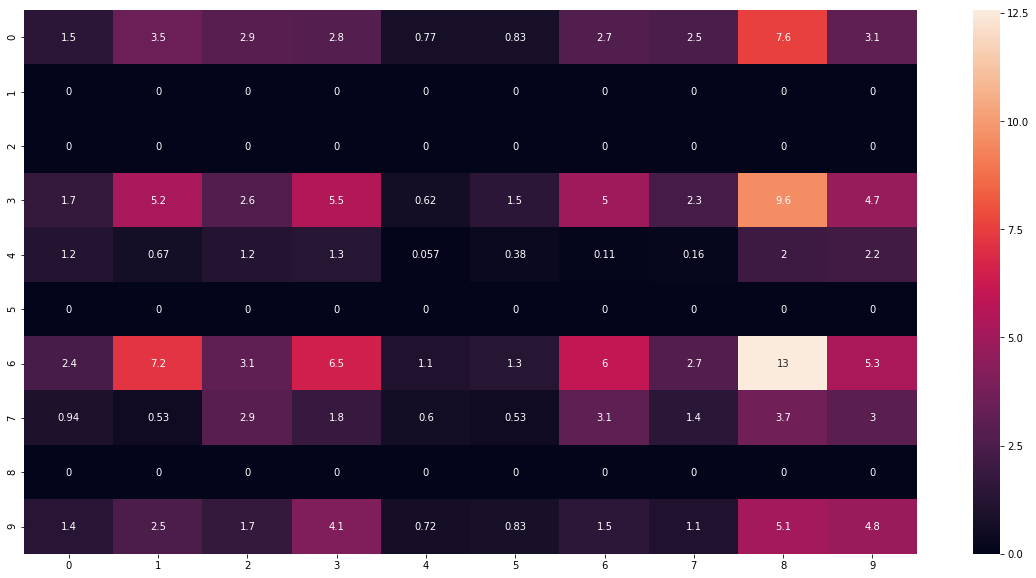

In [261]:
#Que3.3 Determine how similar the first 10 users are to each other and visualise it.
x=user_predicted_ratings[:10,:10]
plt.figure(figsize = (20,10))
sns.heatmap(x,annot = True)

In [262]:
user_predicted_ratings.shape


(17126, 2033)

In [263]:
dummy_train.shape

(17126, 2033)

Since we are interested only in the beer not rated by the user, we will ignore the beer rated by the user by making it zero. 

In [264]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.459013,3.472281,2.909965,2.758249,0.766582,0.828718,2.670985,2.466327,7.560353,3.104483,...,0.472631,2.220358,5.047990,0.558260,0.508283,1.076745,0.926801,1.172022,3.184286,2.345041
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.736459,5.232000,2.608473,5.520913,0.617096,1.454522,4.960338,2.297307,9.613358,4.735883,...,2.209763,4.217675,10.267089,1.872668,1.444542,1.249209,2.403282,0.813224,7.954225,3.892143
0beerguy0,1.181540,0.666742,1.188188,1.299909,0.057375,0.380844,0.109678,0.161746,1.982768,2.198563,...,0.000000,0.002130,0.037303,0.000000,0.006908,0.000000,0.000000,0.293302,0.273810,0.194828


In [265]:
#Que3.6 Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' 
user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
2093    42.112889
412     39.388631
92      35.011221
695     33.792059
88      32.955589
Name: cokes, dtype: float64

In [266]:
user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
1093     42.471348
2093     38.464480
7971     36.110401
11757    35.073658
19960    34.479240
Name: genog, dtype: float64

In [267]:
user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
412     60.902990
2093    57.226902
1093    56.040112
1904    54.774610
104     54.502916
Name: giblet, dtype: float64

# Item Based Similarity

In [268]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zuccard,zuffenhausen,zuggy9,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
beer_features.shape

(2033, 17126)

Normalising the beer rating for each beer id

In [270]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [271]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zuccard,zuffenhausen,zuggy9,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [272]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -2.16662545e-02  7.22803418e-02 ...  3.39328400e-04
   1.51092576e-02  8.29837020e-04]
 [-2.16662545e-02  1.00000000e+00 -4.79777625e-02 ...  8.47727942e-03
   0.00000000e+00  2.92055030e-03]
 [ 7.22803418e-02 -4.79777625e-02  1.00000000e+00 ...  0.00000000e+00
   8.86032910e-04  0.00000000e+00]
 ...
 [ 3.39328400e-04  8.47727942e-03  0.00000000e+00 ...  1.00000000e+00
   1.13923724e-02  5.07509823e-02]
 [ 1.51092576e-02  0.00000000e+00  8.86032910e-04 ...  1.13923724e-02
   1.00000000e+00 -1.81022018e-02]
 [ 8.29837020e-04  2.92055030e-03  0.00000000e+00 ...  5.07509823e-02
  -1.81022018e-02  1.00000000e+00]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [273]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.00000000e+00, 0.00000000e+00, 7.22803418e-02, ...,
        3.39328400e-04, 1.51092576e-02, 8.29837020e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.47727942e-03, 0.00000000e+00, 2.92055030e-03],
       [7.22803418e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 8.86032910e-04, 0.00000000e+00],
       ...,
       [3.39328400e-04, 8.47727942e-03, 0.00000000e+00, ...,
        1.00000000e+00, 1.13923724e-02, 5.07509823e-02],
       [1.51092576e-02, 0.00000000e+00, 8.86032910e-04, ...,
        1.13923724e-02, 1.00000000e+00, 0.00000000e+00],
       [8.29837020e-04, 2.92055030e-03, 0.00000000e+00, ...,
        5.07509823e-02, 0.00000000e+00, 1.00000000e+00]])

In [274]:
item_correlation.shape 

(2033, 2033)

In [275]:
item_correlation[np.argsort(item_correlation)[-1:]]

array([[[4.16931777e-02, 0.00000000e+00, 6.79160939e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.41310695e-03, 0.00000000e+00, ...,
         0.00000000e+00, 9.71805293e-04, 0.00000000e+00],
        [0.00000000e+00, 6.24336021e-03, 0.00000000e+00, ...,
         0.00000000e+00, 4.71602339e-03, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.15256706e-03, 1.09259010e-01],
        [0.00000000e+00, 0.00000000e+00, 2.50810136e-02, ...,
         0.00000000e+00, 1.27224540e-02, 1.14051981e-01],
        [8.29837020e-04, 2.92055030e-03, 0.00000000e+00, ...,
         5.07509823e-02, 0.00000000e+00, 1.00000000e+00]]])

# Prediction

In [276]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.36681622, 0.34514564, 0.80454434, ..., 0.24088412, 0.15932819,
        0.83686441],
       [0.        , 0.08690708, 0.04919635, ..., 0.09419256, 0.13679415,
        0.0228047 ],
       [0.        , 0.00695722, 0.02917636, ..., 0.01938834, 0.00802767,
        0.        ],
       ...,
       [0.03525293, 0.12412676, 0.00695167, ..., 0.03848238, 0.        ,
        0.01213991],
       [0.18773317, 0.        , 0.45620575, ..., 0.0706529 , 0.17769882,
        0.04140673],
       [0.02731736, 0.13629968, 0.00853477, ..., 0.00852465, 0.        ,
        0.00343626]])

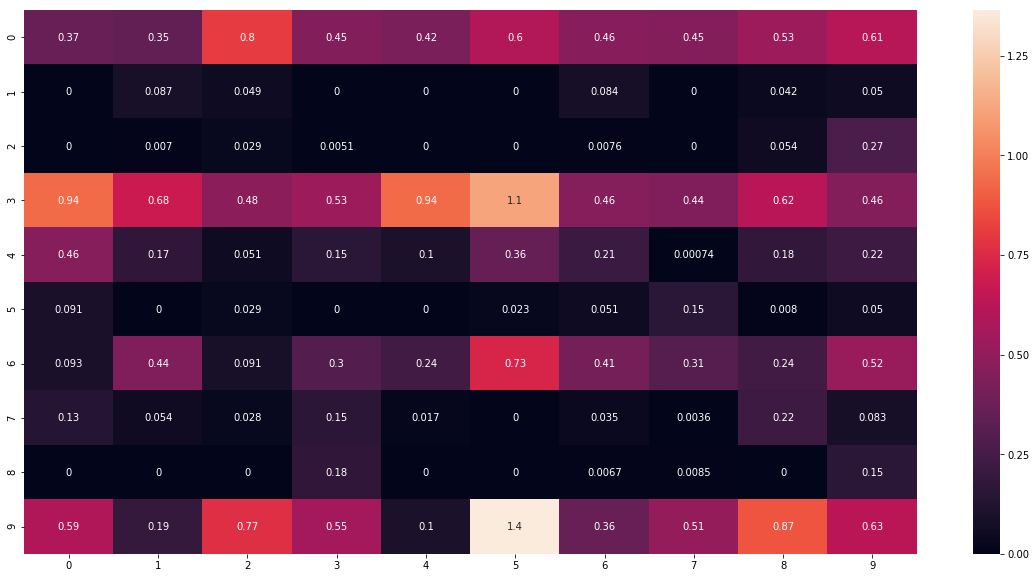

In [277]:
#Que 3.4 - Compute and visualise the similarity between the first 10 beers.
x=item_predicted_ratings[:10,:10]
plt.figure(figsize = (20,10))
sns.heatmap(x,annot = True)

In [278]:
item_predicted_ratings.shape

(17126, 2033)

In [279]:
dummy_train.shape

(17126, 2033)

### Filtering the rating only for the beers not rated by the user for recommendation

In [280]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.366816,0.345146,0.804544,0.450220,0.422921,0.600805,0.464991,0.453117,0.531276,0.613412,...,0.058050,0.389560,0.672227,0.171531,0.563684,0.697818,0.115172,0.240884,0.159328,0.836864
01Ryan10,0.000000,0.086907,0.049196,0.000000,0.000000,0.000000,0.083609,0.000000,0.041965,0.049544,...,0.117547,0.000132,0.000000,0.000000,0.142346,0.000000,0.027675,0.094193,0.136794,0.022805
04101Brewer,0.000000,0.006957,0.029176,0.005092,0.000000,0.000000,0.007616,0.000000,0.053619,0.270518,...,0.000000,0.044268,0.158098,0.000000,0.000000,0.000000,0.000000,0.019388,0.008028,0.000000
05Harley,0.940446,0.678957,0.477123,0.529791,0.941813,1.113826,0.458576,0.437139,0.618374,0.456874,...,0.273931,1.270855,0.889707,0.516814,0.350433,0.939884,0.550436,0.322564,0.645113,0.745796
0beerguy0,0.459955,0.171208,0.050777,0.152566,0.101111,0.361166,0.209079,0.000740,0.178892,0.222570,...,0.026992,0.126766,0.020951,0.055591,0.000000,0.000000,0.000000,0.037306,0.028847,0.026756


In [281]:
#3.6 Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' 
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
1876     12.184469
19426    11.819615
5357     11.761295
36185    10.827046
24905    10.616134
Name: cokes, dtype: float64

In [282]:
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
22809    3.954096
2263     3.777080
40999    3.736592
40936    3.685631
14505    3.654732
Name: genog, dtype: float64

In [283]:
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
259      4.437282
13906    4.207758
385      3.834535
781      3.614214
6549     3.613116
Name: giblet, dtype: float64

# Evaluation

## Using User Similarity

In [284]:
test_beer_features = test.pivot(
   index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [285]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.21816378, 1.03783952, 0.18539854, ..., 0.        , 0.05507492,
        0.29147749],
       [0.05299649, 0.54186814, 0.09518305, ..., 0.        , 0.08565145,
        0.6412938 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30744948, 0.21858795, 1.45297942, ..., 0.        , 0.30615474,
        0.03321966],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Doing prediction for the beers rated by the user

In [286]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [287]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the movies rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [288]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]
X=X.fillna(0)

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [289]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [290]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [291]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.09486459673008484


## Using Item similarity

In [292]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [293]:
test_item_correlation.shape

(2033, 2033)

In [294]:
test_beer_features.shape

(2033, 12306)

In [295]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [297]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]
X = X.fillna(0)
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
   index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [298]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.07533064191744164


In [299]:
#Que 3.5 Compare the performance of the two models using test data and suggest the one that should be deployed.
#Answer - I get the RMSE for user based filtering=0.094 and for item based  filtering =0.075.
# Lower value of RMSE signifies Item based algo is good enough to be deployed on prodocution. 